In [ ]:
import cv2
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load VGG16 pre-trained model (without top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a model to extract features from the 'block5_pool' layer
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

def extract_features(image_path):
    """
    Extracts features from a single image using VGG16.

    Args:
        image_path (str): Path to the image file.

    Returns:
        numpy.ndarray: The extracted features.
    """

    # Load the image and preprocess it for VGG16
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = preprocess_input(image)

    # Add batch dimension and extract features
    image = np.expand_dims(image, axis=0)
    features = feature_extractor.predict(image)

    return features


def extract_features_from_dataset(dataset_path, output_path):
    """
    Extracts features for all images in a dataset and saves them to the output directory.

    Args:
        dataset_path (str): Path to the dataset directory.
        output_path (str): Path to the directory where features will be saved.

    Returns:
        dict: A dictionary containing features for each category.
    """

    features_dict = {}

    # Loop through each category (subfolder)
    for subfolder in os.listdir(dataset_path):
        subfolder_path = os.path.join(dataset_path, subfolder)

        if os.path.isdir(subfolder_path):
            # Create a directory to store the features for this category
            category_output_path = os.path.join(output_path, subfolder)
            os.makedirs(category_output_path, exist_ok=True)

            # Store features for this category
            category_features = []

            for img_file in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_file)

                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    # Extract features for the image
                    features = extract_features(img_path)

                    # Append to the category's feature list
                    category_features.append(features)

                    # Save the features for this image as an .npy file
                    feature_file_path = os.path.join(category_output_path, f"{os.path.splitext(img_file)[0]}.npy")
                    np.save(feature_file_path, features)

            # Save all features for this category in the dictionary
            features_dict[subfolder] = np.array(category_features)

    return features_dict


# Paths for the preprocessed dataset and output directory
preprocessed_dataset_path = "../data/processed"
output_features_path = "../data/features"

# Extract features from the dataset and save them to the output directory
features_dict = extract_features_from_dataset(preprocessed_dataset_path, output_features_path)

# Example: Print feature shape for each category
for category, features in features_dict.items():
    print(f"Category: {category}, Feature Shape: {features.shape}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [3]:
import numpy as np
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

# Load the image
image_path = r'../data/raw/cataractDataset/_0_4015166.jpg'
image = cv2.imread(image_path)

# Check if the image is successfully loaded
if image is None:
    print(f"Error: Image not found at {image_path}")
else:
    # Resize the image to match VGG16 input size (224x224 or whatever size you want)
    resized_image = cv2.resize(image, (224, 224))

    # Convert the image to a float32 array and normalize it
    normalized_image = np.array(resized_image, dtype=np.float32)
    normalized_image = preprocess_input(normalized_image)  # Preprocessing step required for VGG16

    # Load the VGG16 model without the top fully connected layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Create a model that outputs features from the last convolutional layer
    feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

    # Extract features from the normalized image
    features = feature_extractor.predict(np.expand_dims(normalized_image, axis=0))

    # Print the shape of the features
    print("Extracted Features Shape:", features.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Extracted Features Shape: (1, 7, 7, 512)


Comparing images from category: cataractDataset
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


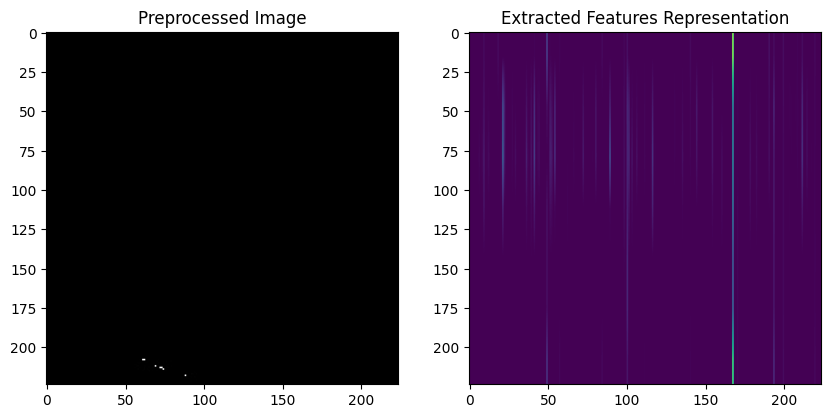

Comparing images from category: diabetic_retinopathy
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


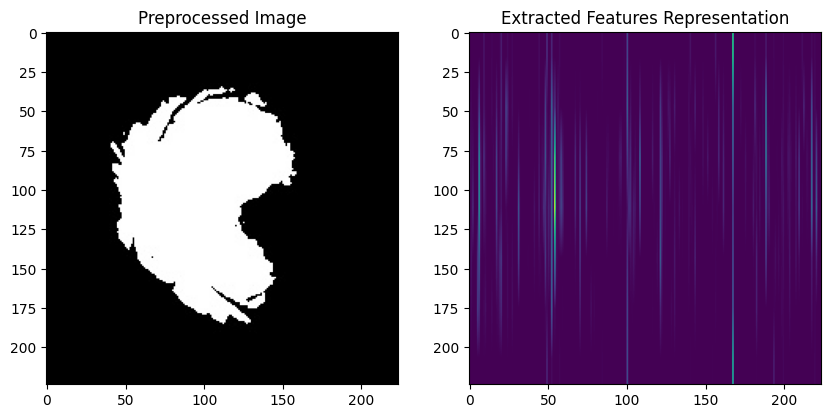

Comparing images from category: glaucoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


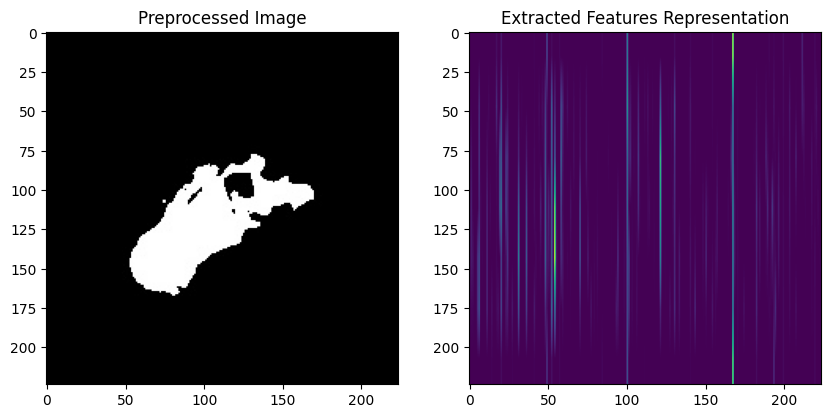

Comparing images from category: normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


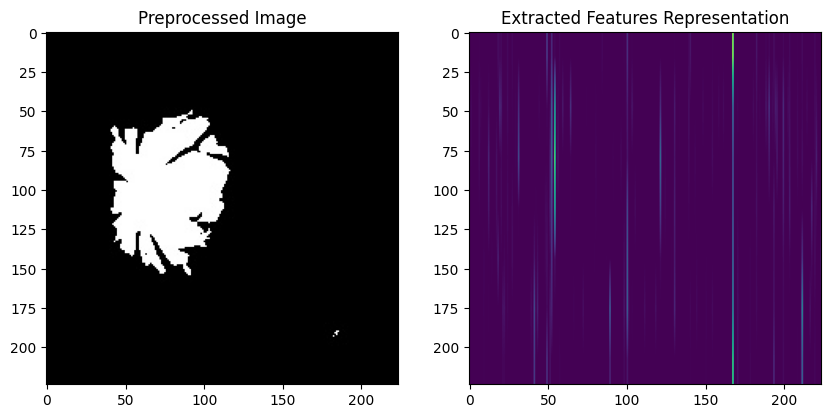

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

# Load VGG16 pre-trained model (without top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a model to extract features from the 'block5_pool' layer
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

# Function to preprocess the image for VGG16
def load_and_preprocess_image(image_path):
    """
    Load an image and apply VGG16 preprocessing.
    
    Args:
        image_path (str): Path to the image file.

    Returns:
        np.ndarray: Preprocessed image ready for VGG16.
    """
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize image to VGG16 input size
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for VGG16
    image = preprocess_input(image)  # Preprocess the image for VGG16
    return image

# Function to extract features from a single image
def extract_features(image_path):
    """
    Extracts features from a single image using VGG16.

    Args:
        image_path (str): Path to the image file.

    Returns:
        numpy.ndarray: The extracted features.
    """
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)  # Add batch dimension
    features = feature_extractor.predict(preprocessed_image)
    return features

# Function to compare preprocessed images with extracted features
def compare_preprocessed_and_features(image_path, feature_matrix):
    """
    Display the preprocessed image and an image representing the features.

    Args:
        image_path (str): Path to the original image.
        feature_matrix (np.ndarray): Feature matrix extracted from the image.
    """
    # Load and preprocess the original image
    original_image = cv2.imread(image_path)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting

    # Get an average representation of the features for visualization
    feature_image = np.mean(feature_matrix, axis=(0, 1))  # Average features
    feature_image = (feature_image - feature_image.min()) / (feature_image.max() - feature_image.min())  # Normalize

    # Resize feature representation for comparison
    feature_image_resized = cv2.resize(feature_image, (224, 224))

    # Plot both images
    plt.figure(figsize=(10, 5))

    # Preprocessed image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title("Preprocessed Image")

    # Feature representation
    plt.subplot(1, 2, 2)
    plt.imshow(feature_image_resized)
    plt.title("Extracted Features Representation")

    plt.show()

# Path to your preprocessed dataset
preprocessed_dataset_path = "../data/processed"  # Adjust path as needed

# Path for extracted features
extracted_features_path = "../data/features"  # Adjust path as needed

# Example: Compare one image from each category's extracted features with preprocessed images
for category in os.listdir(preprocessed_dataset_path):
    category_folder = os.path.join(preprocessed_dataset_path, category)
    
    if os.path.isdir(category_folder):
        # Find the first image in the category folder
        first_image_path = next(
            (os.path.join(category_folder, f) for f in os.listdir(category_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))), None)
        
        # Extract features for the first image
        if first_image_path:
            print(f"Comparing images from category: {category}")

            # Extract features
            features = extract_features(first_image_path)

            # Compare the preprocessed image and the extracted features
            compare_preprocessed_and_features(first_image_path, features)


In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input

# Suppress TensorFlow warnings and logs
tf.get_logger().setLevel('ERROR')  # This will remove verbose logging from TensorFlow

# Load VGG16 pre-trained model (without top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a model to extract features from the 'block5_pool' layer
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

def extract_features(image_path):
    """
    Extracts features from a single image using VGG16.

    Args:
        image_path (str): Path to the image file.

    Returns:
        numpy.ndarray: The extracted features.
    """
    # Load the image and preprocess it for VGG16
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = preprocess_input(image)

    # Add batch dimension and extract features
    image = np.expand_dims(image, axis=0)
    features = feature_extractor.predict(image, verbose=0)  # Set verbose=0 to suppress output

    # Add a singleton dimension to ensure consistent shape (1, 7, 7, 512)
    return np.expand_dims(features, axis=0)

def extract_features_for_category(category_folder, output_path):
    """
    Extracts features for all images in a category directory and saves them.

    Args:
        category_folder (str): Path to the category folder (e.g., cataractDataset).
        output_path (str): Path to the directory where features will be saved.

    Returns:
        numpy.ndarray: Extracted features.
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_path, exist_ok=True)

    # List all image files in the category folder
    image_files = [f for f in os.listdir(category_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    category_features = []

    # Use tqdm to track progress for the entire extraction process
    with tqdm(total=len(image_files), desc=f"Extracting features from {os.path.basename(category_folder)}") as pbar:
        for img_file in image_files:
            img_path = os.path.join(category_folder, img_file)

            # Extract features for the image
            features = extract_features(img_path)

            # Append the features to the category feature list
            category_features.append(features)

            # Save the features for this image as an .npy file
            feature_file_path = os.path.join(output_path, f"{os.path.splitext(img_file)[0]}.npy")
            np.save(feature_file_path, features)

            # Update the progress bar after processing each image
            pbar.update(1)

    # Convert the list of features into a numpy array
    category_features = np.array(category_features)

    # Return the extracted features
    return category_features

# Path to the category folder (e.g., cataractDataset)
category_folder_path = "../data/processed/cataractDataset"

# Path to save extracted features
output_path = "../data/features/cataractDataset"

# Extract features for the specified category
category_features = extract_features_for_category(category_folder_path, output_path)

# Print the shape of the extracted features
print(f"Category: cataractDataset, Feature Shape: {category_features.shape}")


Extracting features from cataractDataset: 100%|███████████████████████████████████████████████████████████████████████████████| 1038/1038 [59:44<00:00,  3.45s/it]


Category: cataractDataset, Feature Shape: (1038, 1, 1, 7, 7, 512)


In [ ]:
import numpy as np
import cv2
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

# Directory containing the images
image_folder = r'../data/processed/cataractDataset'

# Directory where extracted features will be saved
destination_folder = r'../data/features/cataractDataset'

# Create destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Load the VGG16 model without the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a model that outputs features from the last convolutional layer
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Loop through all images in the folder
for filename in os.listdir(image_folder):
    # Get the full path to the image
    image_path = os.path.join(image_folder, filename)

    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is successfully loaded
    if image is not None:
        # Resize the image to match VGG16 input size (224x224)
        resized_image = cv2.resize(image, (224, 224))

        # Convert the image to a float32 array and normalize it
        normalized_image = np.array(resized_image, dtype=np.float32)
        normalized_image = preprocess_input(normalized_image)  # Preprocessing step required for VGG16

        # Extract features from the normalized image
        features = feature_extractor.predict(np.expand_dims(normalized_image, axis=0))

        # Save the extracted features as a .npy file in the destination folder
        feature_file_path = os.path.join(destination_folder, filename.split('.')[0] + '_features.npy')
        np.save(feature_file_path, features)

        # Print the shape of the extracted features along with the filename
        print(f"Processed {filename}, Extracted Features Shape: {features.shape}, Saved to: {feature_file_path}")
    else:
        print(f"Error: Image not found or could not be loaded at {image_path}")

print(f"Feature extraction and saving complete. Features saved in {destination_folder}.")


Error: Image not found or could not be loaded at ../data/processed/cataractDataset\.ipynb_checkpoints
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Processed 0_left.jpg, Extracted Features Shape: (1, 7, 7, 512), Saved to: ../data/features/cataractDataset\0_left_features.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processed 103_left.jpg, Extracted Features Shape: (1, 7, 7, 512), Saved to: ../data/features/cataractDataset\103_left_features.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processed 1062_right.jpg, Extracted Features Shape: (1, 7, 7, 512), Saved to: ../data/features/cataractDataset\1062_right_features.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processed 1083_left.jpg, Extracted Features Shape: (1, 7, 7, 512), Saved to: ../data/features/cataractDataset\1083_left_features.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processed 1084_right.jpg, Extracted Features Shape: (1, 7, 7, 512), Saved to: ../data/features/cataractDataset\1084_right_features.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processed 1102_left.j

In [17]:
import os
import numpy as np

def count_features_and_shapes(features_path):
    """
    Counts the number of features extracted and shows their shape for each category.

    Args:
        features_path (str): Path to the features directory.

    Returns:
        dict: A dictionary containing the count and shape of features for each category.
    """
    features_info = {}

    # Loop through each category (subfolder)
    for subfolder in os.listdir(features_path):
        subfolder_path = os.path.join(features_path, subfolder)

        if os.path.isdir(subfolder_path):
            # Initialize count and shape for this category
            count = 0
            shape = None

            # Loop through each feature file in the category folder
            for feature_file in os.listdir(subfolder_path):
                if feature_file.lower().endswith('.npy'):
                    count += 1  # Increment count for each feature file
                    # Load the feature file to get its shape
                    feature_data = np.load(os.path.join(subfolder_path, feature_file))
                    
                    # Get shape (assuming all feature files in the category have the same shape)
                    if shape is None:
                        shape = feature_data.shape
            
            # Store the count and shape for this category
            features_info[subfolder] = (count, shape)

    return features_info

# Path to the existing features directory
existing_features_path = "../data/features"

# Count features and get shapes for each category
features_info_dict = count_features_and_shapes(existing_features_path)

# Print the count and shape of features for each category in the desired format
for category, (count, shape) in features_info_dict.items():
    print(f"Category: {category}, Total Features present: {count}, Feature Shape: {shape}")


Category: cataractDataset, Total Features present: 1038, Feature Shape: (1, 7, 7, 512)
Category: diabetic_retinopathy, Total Features present: 1098, Feature Shape: (1, 7, 7, 512)
Category: glaucoma, Total Features present: 1007, Feature Shape: (1, 7, 7, 512)
Category: normal, Total Features present: 1074, Feature Shape: (1, 7, 7, 512)
